# データ確認

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## データ読み込み

In [2]:
# データ読み込み
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

train.shape, test.shape

((517754, 14), (172585, 13))

## 基本情報の確認

In [3]:
def check_df(df, columns=None, show_values_limit=10):
    """
    DataFrameの各列の情報（データ型、NaN数、ユニーク数、ユニーク値）を一覧表示します

    Parameters:
    - df: 対象のDataFrame
    - columns: 対象の列 (list)。Noneのときは全列
    - show_values_limit: ユニーク値を表示する最大数。これを超える列は「多すぎる」と表示されます

    Returns:
    - info_df: 各列の情報をまとめたDataFrame
    """
    if columns is not None:
        df = df[columns]

    type_series = df.dtypes
    nan_count_series = df.isnull().sum()
    nunique_series = df.nunique()

    unique_values = {}
    for col in df.columns:
        if nunique_series[col] <= show_values_limit:
            unique_values[col] = df[col].unique().tolist()
        else:
            unique_values[col] = f"> {show_values_limit} unique values"

    info_df = pd.DataFrame(
        {
            "dtypes": type_series.astype(str),
            "NaN Count": nan_count_series,
            "Nunique": nunique_series,
            "Unique Values": pd.Series(unique_values),
        }
    )

    info_df = info_df.reset_index().rename(columns={"index": "Column"})

    return info_df

In [4]:
train.head(3)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30


In [5]:
test.head(3)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1


In [6]:
check_df(train)

,Column,dtypes,NaN Count,Nunique,Unique Values
0,id,int64,0,517754,> 10 unique values
1,road_type,object,0,3,"[urban, rural, highway]"
2,num_lanes,int64,0,4,"[2, 4, 1, 3]"
3,curvature,float64,0,261,> 10 unique values
4,speed_limit,int64,0,5,"[35, 70, 60, 45, 25]"
5,lighting,object,0,3,"[daylight, dim, night]"
6,weather,object,0,3,"[rainy, clear, foggy]"
7,road_signs_present,bool,0,2,"[False, True]"
8,public_road,bool,0,2,"[True, False]"
9,time_of_day,object,0,3,"[afternoon, evening, morning]"


In [7]:
check_df(test)

,Column,dtypes,NaN Count,Nunique,Unique Values
0,id,int64,0,172585,> 10 unique values
1,road_type,object,0,3,"[highway, urban, rural]"
2,num_lanes,int64,0,4,"[2, 3, 4, 1]"
3,curvature,float64,0,195,> 10 unique values
4,speed_limit,int64,0,5,"[45, 35, 25, 70, 60]"
5,lighting,object,0,3,"[night, dim, daylight]"
6,weather,object,0,3,"[clear, foggy, rainy]"
7,road_signs_present,bool,0,2,"[True, False]"
8,public_road,bool,0,2,"[True, False]"
9,time_of_day,object,0,3,"[afternoon, evening, morning]"


## 数値型とカテゴリカル型の確認

In [8]:
# 数値型変数を抽出
num_features = train.select_dtypes(include=[np.number]).columns.tolist()
num_features.remove("id")
num_features.remove("accident_risk")
num_features

['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']

In [9]:
# カテゴリカル変数を抽出
cat_features = train.select_dtypes(include=["object"]).columns.tolist()
cat_features

['road_type', 'lighting', 'weather', 'time_of_day']

## 目的変数の分布

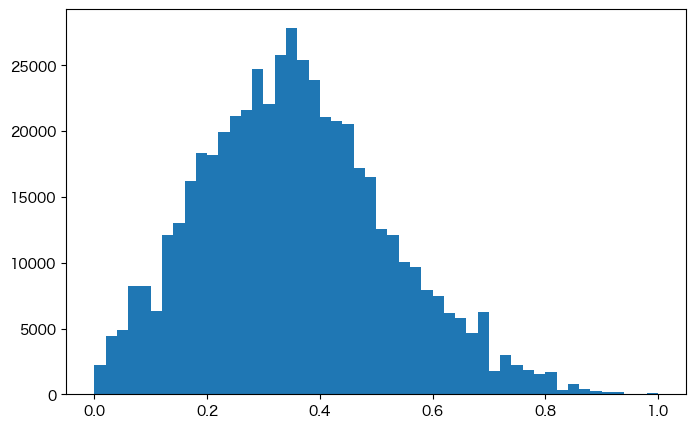

In [10]:
target_col = "accident_risk"

plt.figure(figsize=(8, 5))
plt.hist(train[target_col], bins=50)
plt.show()

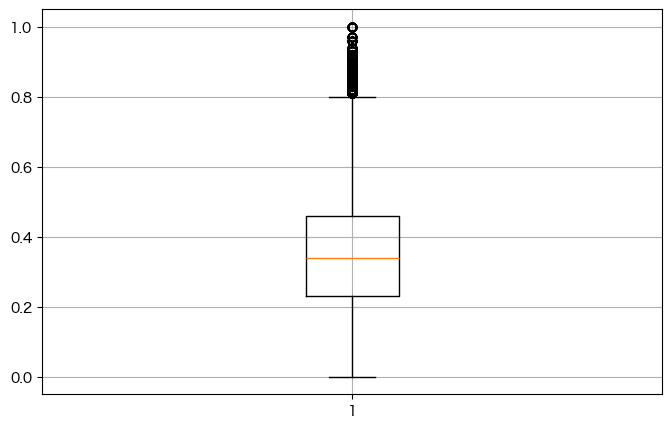

In [11]:
plt.figure(figsize=(8, 5))
plt.boxplot(train[target_col])
plt.grid()
plt.show()